In [126]:
# Importing the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [127]:
# reading the csv file

df = pd.read_csv("C:/Users/viren/OneDrive/Desktop/Skill_circle/Numpy/vg_sales_data.csv")

<h2>Dataset Exploration</h2>

In [128]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [129]:
# shape of the dataset

num_rows = df.shape[0] # 11 rows
num_cols = df.shape[1] # 16598 coloumn
print(f"Number of row in dataframe: {num_rows}")
print(f"Number of row in dataframe: {num_cols}")

Number of row in dataframe: 16598
Number of row in dataframe: 11


In [130]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        16598 non-null  int64  
 1   Name                        16598 non-null  object 
 2   Platform                    16598 non-null  object 
 3   Year                        16327 non-null  float64
 4   Genre                       16598 non-null  object 
 5   Publisher                   16540 non-null  object 
 6   NA_Sales (in millions)      16598 non-null  float64
 7   EU_Sales (in millions)      16598 non-null  float64
 8   JP_Sales (in millions)      16598 non-null  float64
 9   Other_Sales (in millions)   16598 non-null  float64
 10  Global_Sales (in millions)  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [131]:
# statistical description of numerical data

df.describe() 

,Rank,Year,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<h2> Crucial insight from statistical Description</h2>

In [132]:
# The Video games range from year 1980-2020
# There are missing values in 'Year' Coloumn
# The rank starts from 1 and ends at 16600.

In [133]:
# Checking for null values
df.isnull().sum()

Rank                            0
Name                            0
Platform                        0
Year                          271
Genre                           0
Publisher                      58
NA_Sales (in millions)          0
EU_Sales (in millions)          0
JP_Sales (in millions)          0
Other_Sales (in millions)       0
Global_Sales (in millions)      0
dtype: int64

In [134]:
# checking for duplicate records
df.duplicated().sum()

np.int64(0)

<h2>DATA Cleaning</h2>

In [135]:
# Drop all rows with null values
df.dropna(axis=0,inplace=True)

In [136]:
#Check new shape of Dataset after removing nulls
df.shape

(16291, 11)

In [137]:
df['Name'].nunique()

11325

In [138]:
# The dataset contains 16291 rows but there exists only 11325 unique names. this suggests possible duplicate values exists in our data

In [139]:
df[['Name','Year']].duplicated().sum()

np.int64(4196)

In [140]:
# removing duplicate name entries(since all name should be unique)

df.drop_duplicates(subset='Name', keep='first',inplace=True)

In [141]:
df.shape

(11325, 11)

In [142]:
#Checking for alphabetic Data in numeric columns 

df[['NA_Sales (in millions)','EU_Sales (in millions)','JP_Sales (in millions)','Other_Sales (in millions)','Global_Sales (in millions)']].applymap(np.isreal).all()

C:\Users\viren\AppData\Local\Temp\ipykernel_10536\616275528.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['NA_Sales (in millions)','EU_Sales (in millions)','JP_Sales (in millions)','Other_Sales (in millions)','Global_Sales (in millions)']].applymap(np.isreal).all()


NA_Sales (in millions)        True
EU_Sales (in millions)        True
JP_Sales (in millions)        True
Other_Sales (in millions)     True
Global_Sales (in millions)    True
dtype: bool

In [143]:
#glimpse of the clean dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Data Visualization</h2>

In [144]:
#Creating list of numeric coloumn with year excluded.

numeric_cols = df.select_dtypes(include=['float64']).columns.to_list()[1:] # [1:] exclude condition
numeric_cols

['NA_Sales (in millions)',
 'EU_Sales (in millions)',
 'JP_Sales (in millions)',
 'Other_Sales (in millions)',
 'Global_Sales (in millions)']

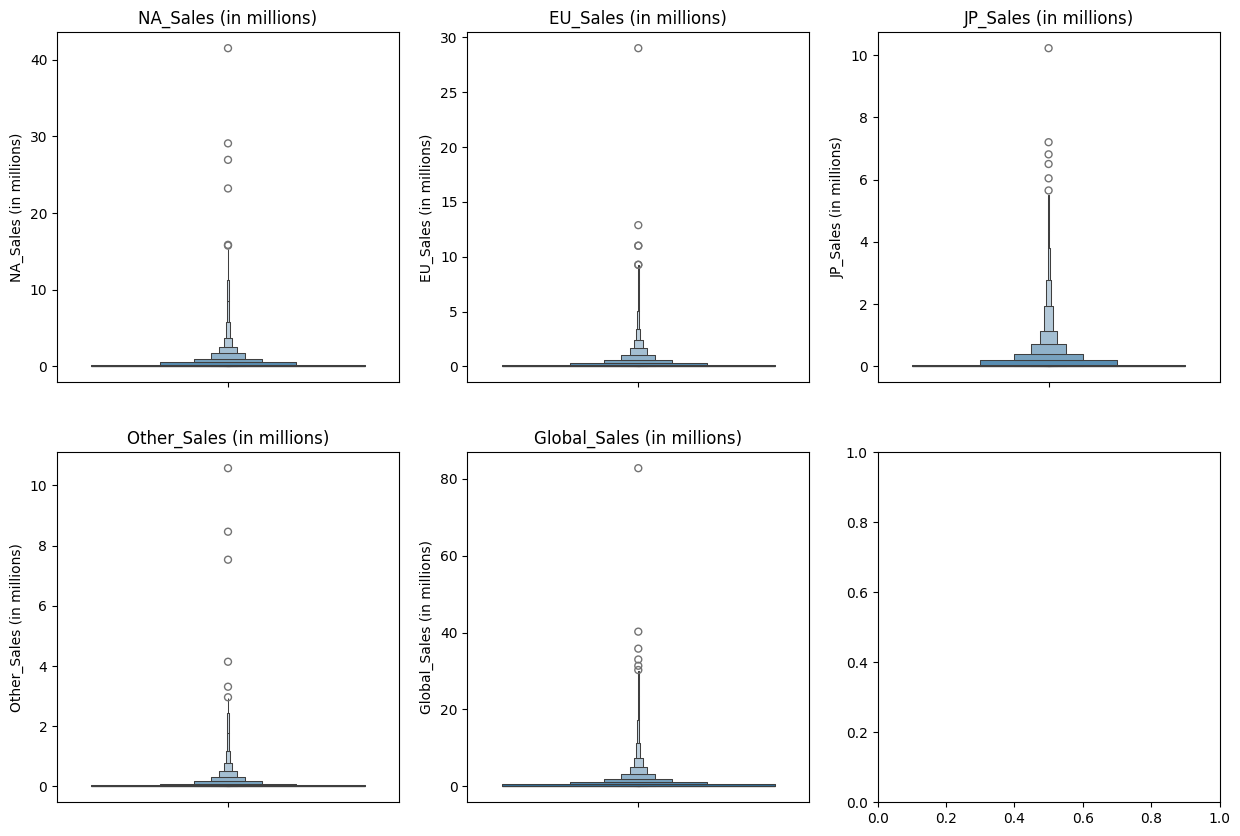

In [145]:
# distribution of sales Data (boxplot)

fig, axes = plt.subplots(2,3, figsize=(15,10))
colors = []
n = 0
for i in range(2):
    for j in range(3):
        if n>4:
            break
        sns.boxenplot(df[numeric_cols[n]], fill=True, ax=axes[i,j])
        axes[i,j].set_title(f"{numeric_cols[n]}")
        n+=1
plt.show()

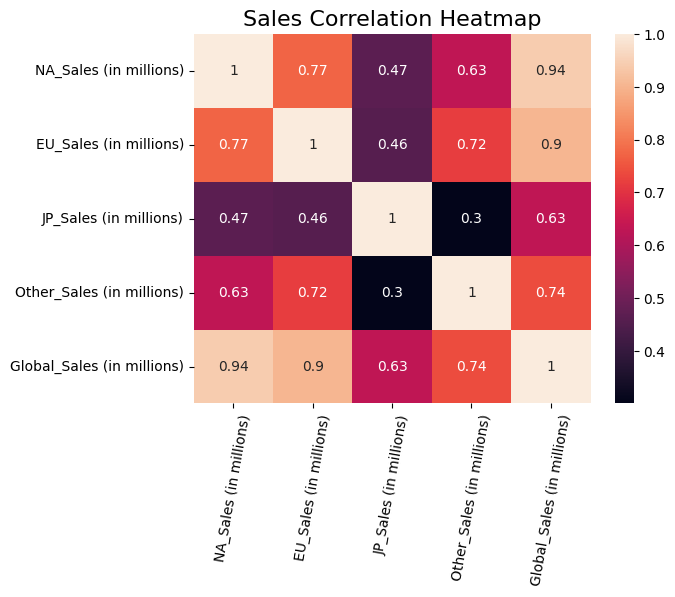

In [146]:
sns.heatmap(df[numeric_cols].corr(numeric_only=True), annot=True)
plt.title("Sales Correlation Heatmap", fontdict={'size':16})
plt.xticks(rotation=80)
plt.show()

<h2>What are the top 10 Game Publications globally</h2>

In [147]:
top10_publish = df.groupby('Publisher')['Global_Sales (in millions)'].sum().sort_values(ascending=False)[:10]

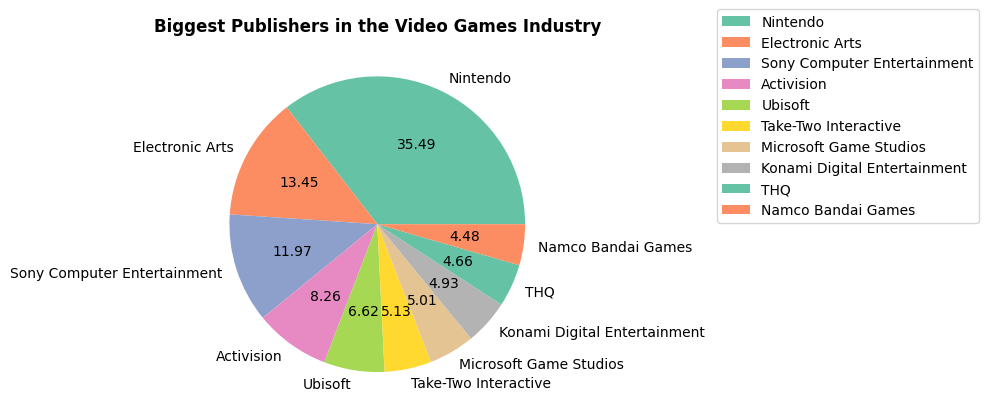

In [148]:
plt.pie(top10_publish.values, labels= top10_publish.index, autopct="%.2f", colors= plt.get_cmap('Set2').colors)
plt.title("Biggest Publishers in the Video Games Industry", fontdict={'weight':'bold'})
plt.legend(bbox_to_anchor= (1.4, 1.1))
plt.show()

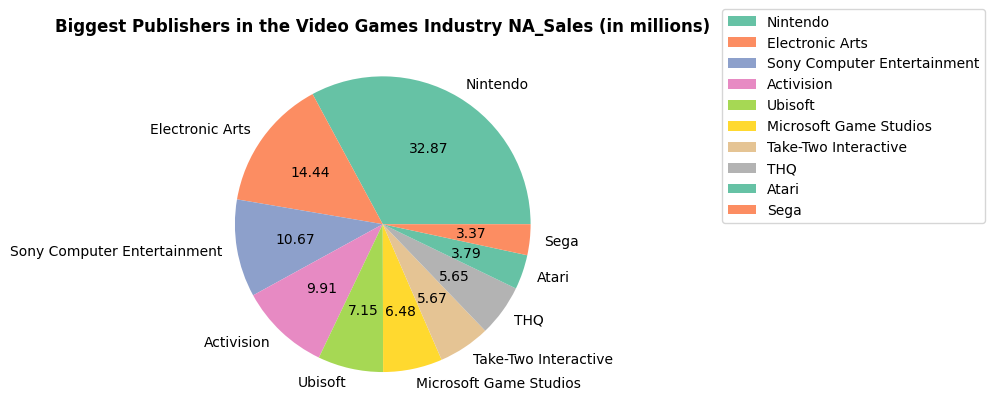

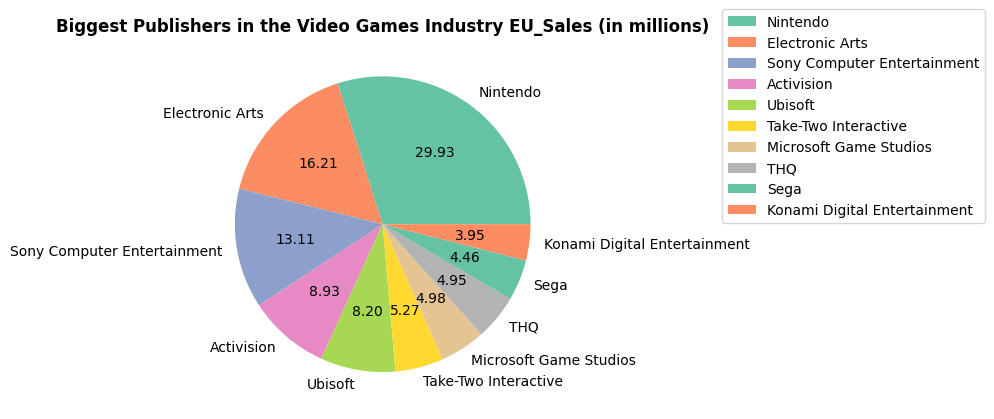

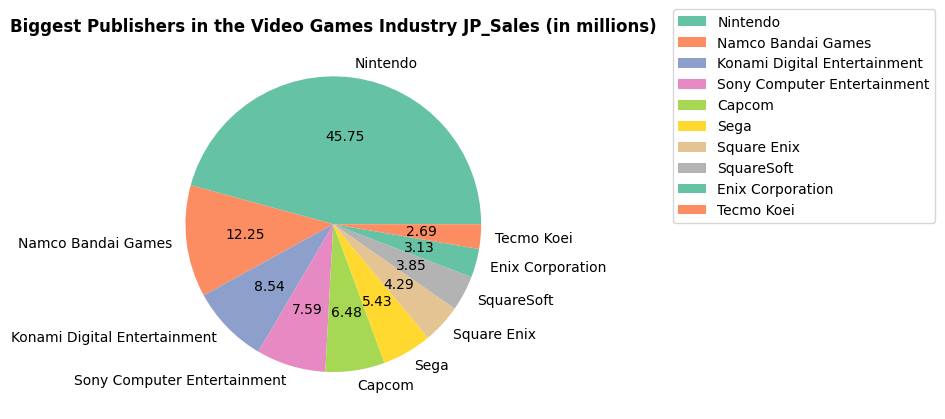

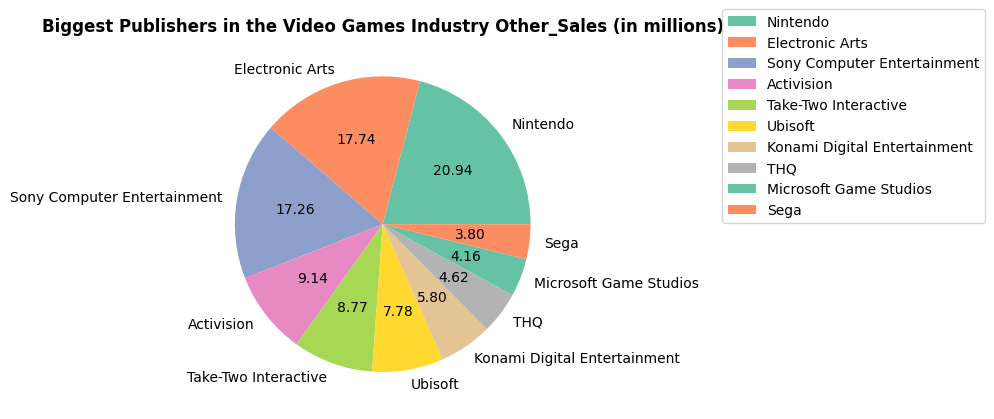

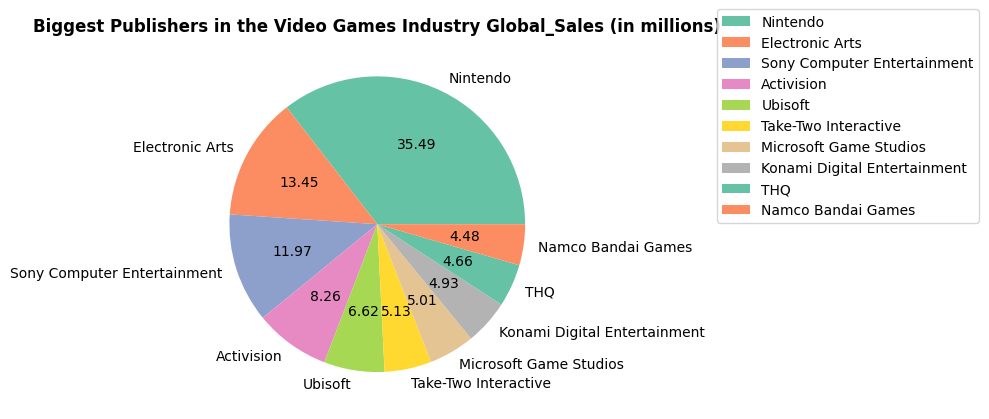

In [149]:
for i in numeric_cols:
 top10_publish = df.groupby('Publisher')[i].sum().sort_values(ascending=False)[:10]
 plt.pie(top10_publish.values, labels= top10_publish.index, autopct="%.2f", colors= plt.get_cmap('Set2').colors)
 plt.title(f"Biggest Publishers in the Video Games Industry {i}", fontdict={'weight':'bold'})
 plt.legend(bbox_to_anchor= (1.4, 1.1))
 plt.show()

<h2>Which Publication has released the most number of games?</h2>

In [150]:
top10_numofgames =df['Publisher'].value_counts().sort_values(ascending=False)[:10]

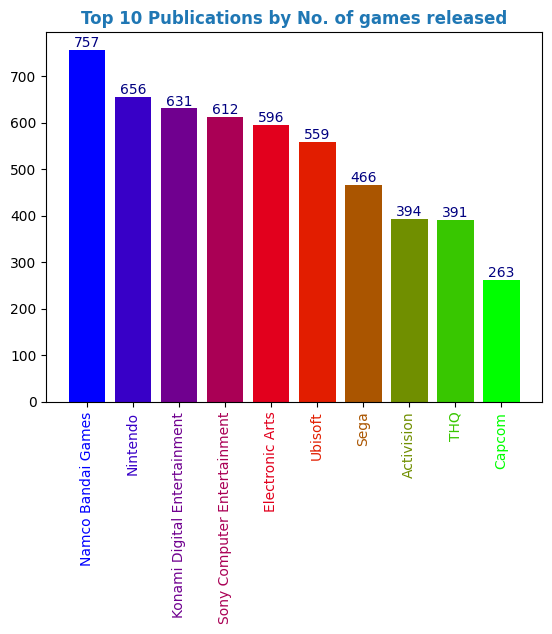

In [151]:
colors = plt.cm.brg(np.linspace(0, 1, len(top10_numofgames.index))) # linspace mean 0-100 4 part devide 0,25,50,75,
bars = plt.bar(top10_numofgames.index, top10_numofgames.values, color=colors)
plt.xticks(rotation=90)
ax = plt.gca() # get the current axes
xticks = ax.get_xticklabels()
for tick, color in zip(xticks, colors):
    tick.set_color(color)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
             ha = 'center', va='bottom', fontsize=10, color= 'navy')
plt.title("Top 10 Publications by No. of games released", fontdict={'weight':'bold'}, color="tab:blue")
plt.show()

<h2>Which Video Game had the most Sales?</h2>

In [152]:
top_10_vg = df.sort_values(by='Global_Sales (in millions)', ascending=False)[:10]

In [153]:
top_10_vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


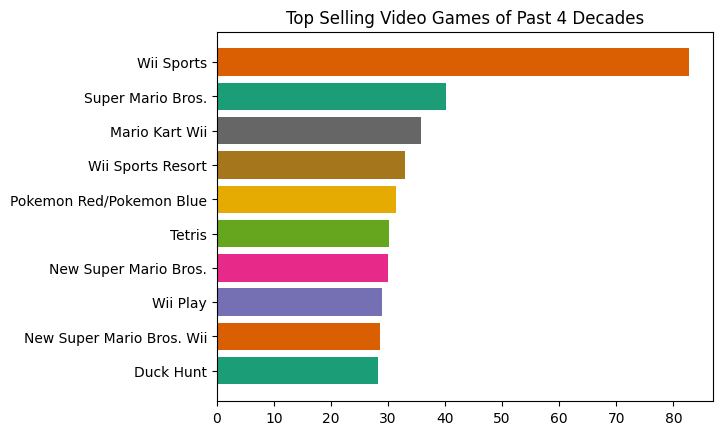

In [154]:
plt.barh(top_10_vg['Name'].values[::-1], top_10_vg['Global_Sales (in millions)'].values[::-1], color=plt.get_cmap('Dark2').colors)
plt.title("Top Selling Video Games of Past 4 Decades")
plt.show()

<h2>Most Successful game of Each Year(Creation Year)</h2>

In [155]:
best_each_year = df.loc[df.groupby('Year')['Global_Sales (in millions)'].idxmax()]
best_each_year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales (in millions),EU_Sales (in millions),JP_Sales (in millions),Other_Sales (in millions),Global_Sales (in millions)
258,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
251,252,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


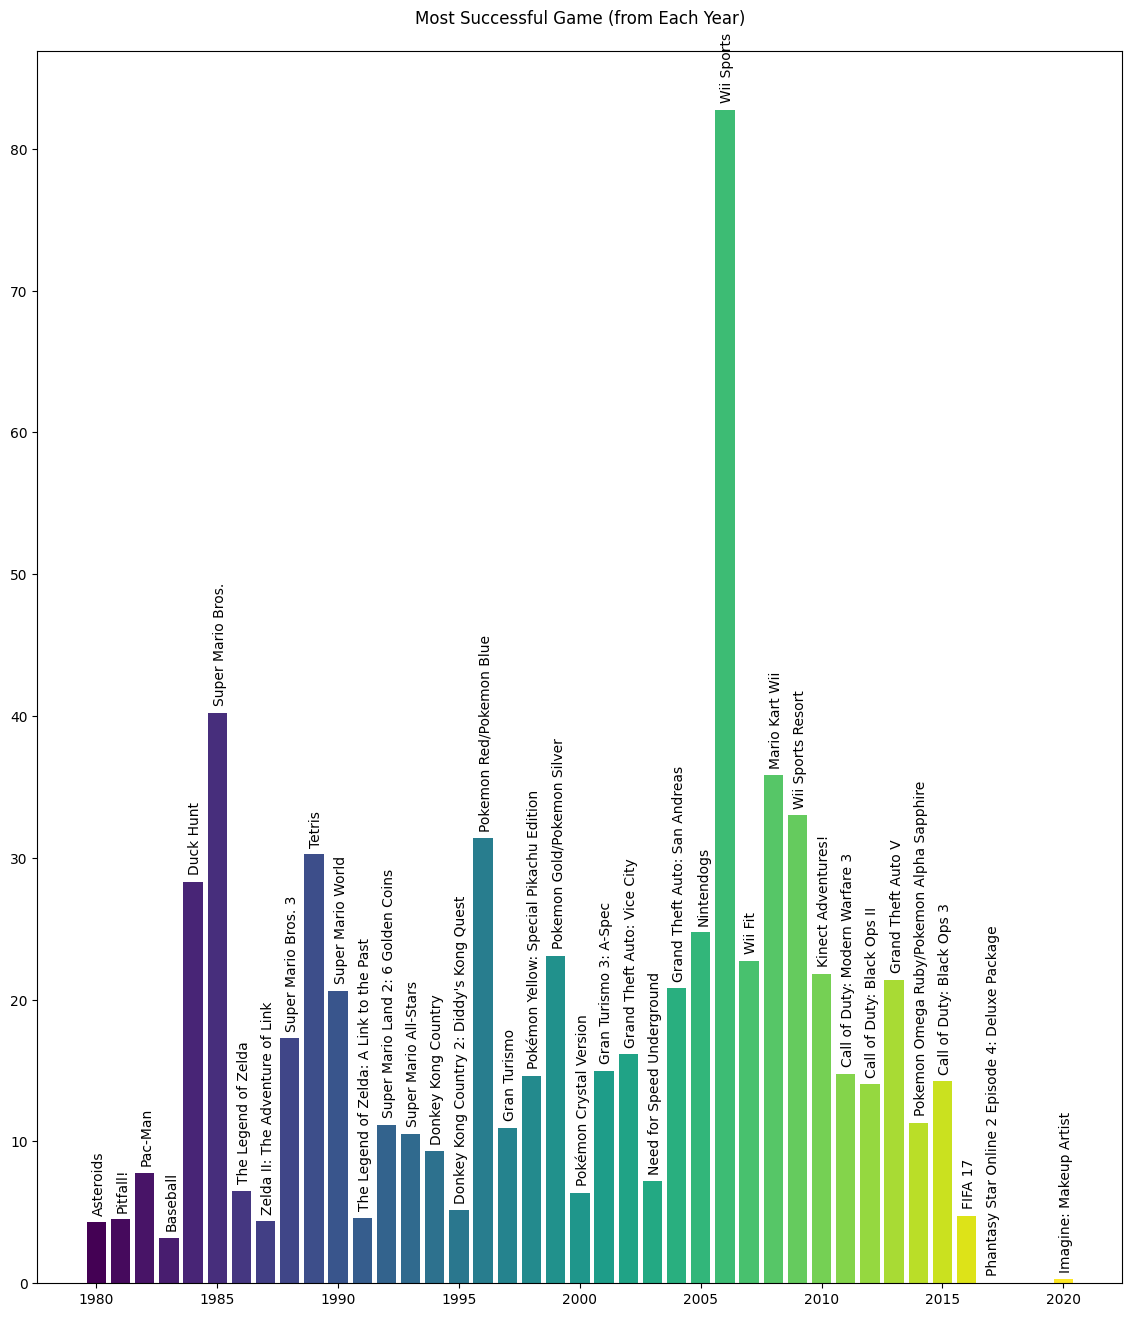

In [156]:
colors = plt.cm.viridis(np.linspace(0, 1, len(best_each_year['Year'].values))) 
plt.figure(figsize=(14,16))
bars = plt.bar(best_each_year['Year'].values,best_each_year['Global_Sales (in millions)'].values, color=colors)
n=0

for bar in bars:
    x = bar.get_x()
    y = bar.get_height()
    plt.text(x+0.5, y+0.5, best_each_year['Name'].values[n], ha='center', va='bottom', rotation=90)
    n+=1
plt.title("Most Successful Game (from Each Year)", pad=20)
plt.show()



<h2>Video Game by Genre</h2>

In [157]:
games_genre = df['Genre'].value_counts()
games_genre

Genre
Action          1896
Sports          1366
Misc            1291
Role-Playing    1206
Adventure       1038
Shooter          806
Racing           760
Simulation       711
Fighting         605
Platform         579
Strategy         576
Puzzle           491
Name: count, dtype: int64

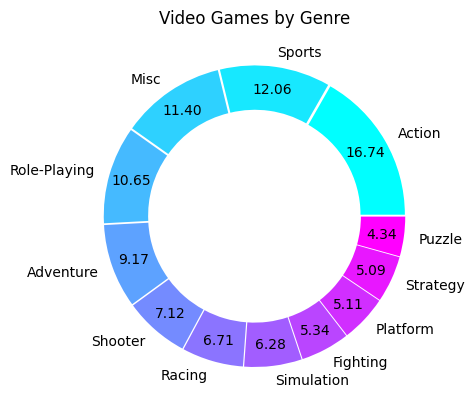

In [158]:
colors = plt.cm.cool(np.linspace(0,1,len(games_genre.index)))
explode = tuple(0.02 for i in range (12))
plt.pie(games_genre.values,labels=games_genre.index,autopct ='%.2f',colors = colors,pctdistance=0.85,explode=explode,wedgeprops={'width':0.3})
plt.title("Video Games by Genre")
plt.show()

In [163]:
# top 5 best selling genres

sales_genre = df.groupby('Genre')['Global_Sales (in millions)'].sum().sort_values(ascending=False)
sales_genre


Genre
Action          1135.45
Sports           941.86
Role-Playing     810.17
Shooter          708.81
Platform         704.76
Misc             644.50
Racing           589.14
Fighting         349.51
Simulation       346.67
Puzzle           219.03
Adventure        199.47
Strategy         160.30
Name: Global_Sales (in millions), dtype: float64

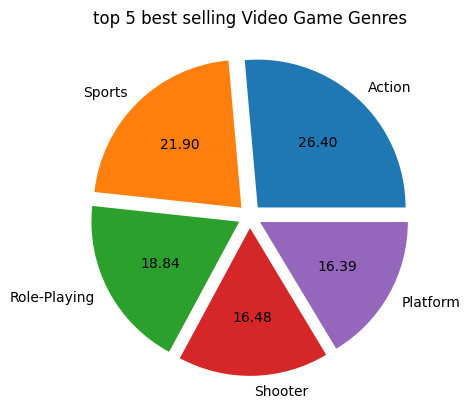

In [168]:
explode=(0.08, 0.08, 0.08, 0.08, 0.08)
fig = plt.Figure()
#fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
plt.pie(sales_genre.values[:5], labels=sales_genre.index[:5], autopct='%.2f', explode=explode,
        textprops={'color':'black'})
plt.title("top 5 best selling Video Game Genres", color= 'black')
plt.show()

<h2> Which Platform published the most Games?</h2>

In [169]:
top5_platform = df['Platform'].value_counts()[:5]

In [171]:
top5_platform

Platform
PS2    1833
DS     1784
PS     1117
Wii     928
PSP     900
Name: count, dtype: int64

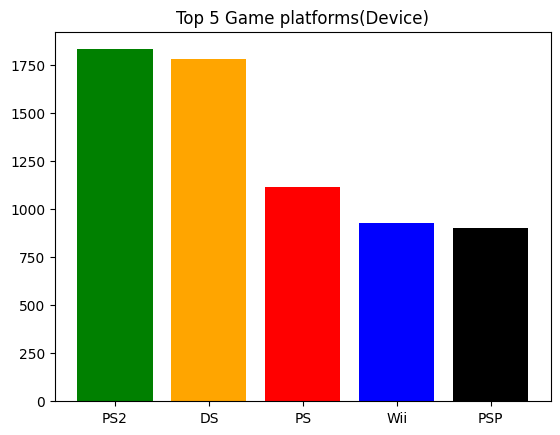

In [170]:
plt.bar(top5_platform.index, top5_platform.values, color=['green','orange','red','blue','black'])
plt.title("Top 5 Game platforms(Device)")
plt.show()

<h2>Conclusions</h2>

In [ ]:
# 1. wii Sports is the top seller in the gamming industry with 82.74 million copies sold.
# 2. Nintendo is the World leading game publisher.
# 3. PS2 is the most utilised gaming device(platform).
# 4. Action is the most preferred genre among gamers(accumulating 26% of the totla sales).